### Pie Charts

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_raw = pd.read_csv(
    "../Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
dtype={"total_homes_sold": "Int32", "region_name": "category"})

In [3]:
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [4]:
ca_housing = (housing_raw
    .loc[(housing_raw["region_name"]
    .str.contains("CA"))]
    #deleting the last 11 spaces in "region_name"(i.e."County,GA")
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .set_index("period_begin").sort_index() # setting different index and sorting it
)

In [5]:
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [6]:
sales_totals = (ca_housing
               .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego']")
               .groupby("region_name")
               .agg({"total_homes_sold":'sum'})
)

sales_totals.head()

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
San Francisco,371776


In [7]:
sales_totals.iloc[:,0][::-1]

region_name
San Francisco     371776
San Diego        2373289
Los Angeles      4622703
Name: total_homes_sold, dtype: Int32

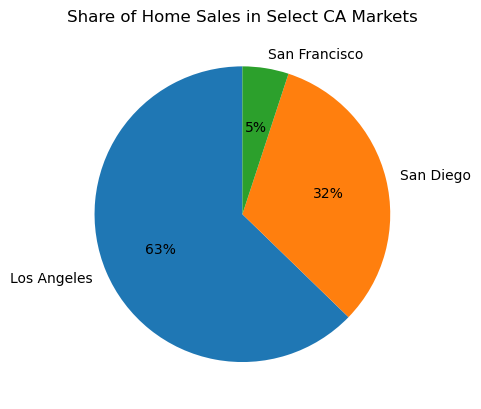

In [8]:
fig,ax=plt.subplots()

ax.pie(x=sales_totals["total_homes_sold"],
      startangle=90,
      labels=["Los Angeles", "San Diego", "San Francisco"],
      autopct="%.0f%%"
      )
ax.set_title("Share of Home Sales in Select CA Markets");

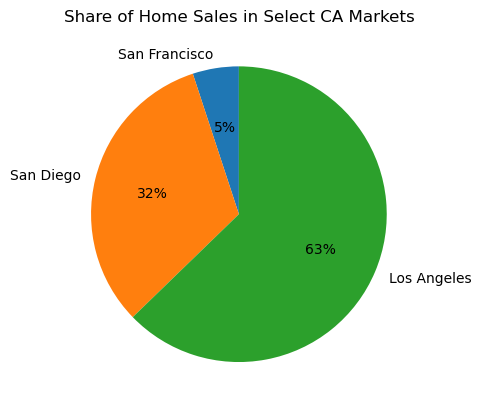

In [9]:
# correting placement of data in pie chart for a clearer pie
fig,ax=plt.subplots()

ax.pie(x=sales_totals["total_homes_sold"][::-1],# revering order
      startangle=90,
      labels=["San Francisco", "San Diego", "Los Angeles"],# swapped label order
      autopct="%.0f%%"
      )
ax.set_title("Share of Home Sales in Select CA Markets");

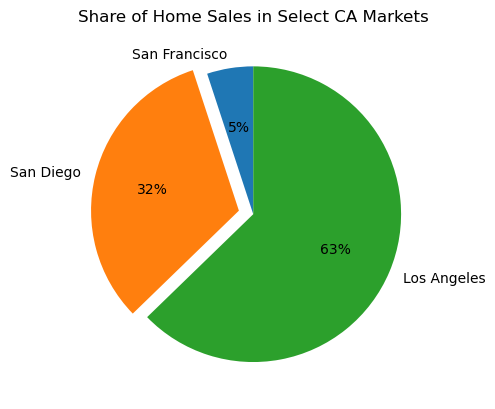

In [10]:
# using "explode" to pull out a lsie of the pie
# correting placement of data in pie chart for a clearer pie
fig,ax=plt.subplots()

ax.pie(x=sales_totals["total_homes_sold"][::-1],# revering order
      startangle=90,
      labels=["San Francisco", "San Diego", "Los Angeles"],# swapped label order
      autopct="%.0f%%",
      explode=(0,.1,0)
      )
ax.set_title("Share of Home Sales in Select CA Markets");

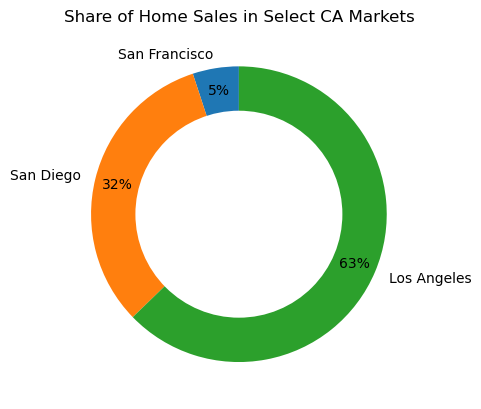

In [13]:
# adding hole to pie to create donut chart
fig,ax=plt.subplots()

ax.pie(x=sales_totals["total_homes_sold"][::-1],# revering order
      startangle=90,
      labels=["San Francisco", "San Diego", "Los Angeles"],# swapped label order
      autopct="%.0f%%",
      pctdistance=.85# to move percentage toward edge of pie
      )
# to create circle
hole= plt.Circle((0,0), 0.7, fc="white")
fig = plt.gcf()
# adding the circle in the pie chart
fig.gca().add_artist(hole)

ax.set_title("Share of Home Sales in Select CA Markets");

Text(0.5, 1.0, 'Your title goes here')

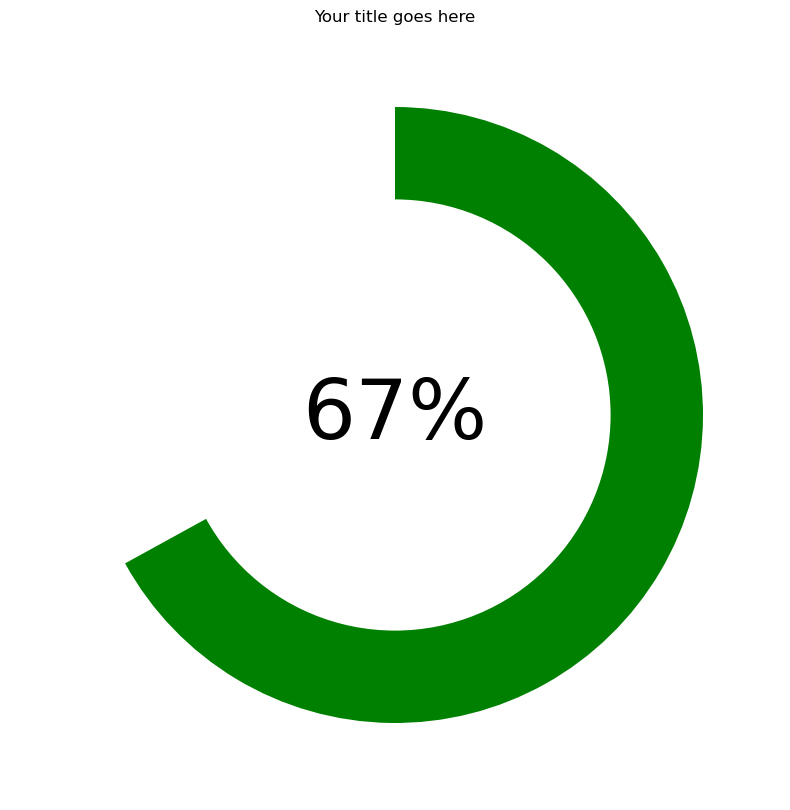

In [17]:
# progress donut
fig, ax = plt.subplots(figsize=(10,10))

ax.pie([.33,.67],
      startangle=90,
      labels=["",""],
#       autopct="%.0f%%",
#       pctdistance=.85,
      colors=["white","green"]
)

# to create circle
hole= plt.Circle((0,0), 0.7, fc="white")
fig = plt.gcf()
# adding the circle in the pie chart
fig.gca().add_artist(hole)

# to add center text
plt.text(0,
        0,
        "67%",
        ha="center",
        va="center",
        fontsize=60
)

ax.set_title("Your title goes here", fontsize=12)